<a href="https://colab.research.google.com/github/SamariaSpringfield/MAT421_/blob/main/Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Algebra and Systems of Linear Equations**

*Section 1.1-4*

In this section we will focus on linear relationships, a fundamental relationship in engineering and science alike.


**1.1 Basics of Linear Algebra**

Sets - Collection of objects {}

Union - A U B - Set containing all elements of A and B

Intersect - A n B - Set Containing all elements thats belong to both A and B

Naturals - N = {1,2,3,4,..}

Wholes - W = N U {0}

Integers - Z = W U {-1,-2,-3,....}

Rationals - Q = { p/g : p ∊ Z , q ∊ Z \ {0}}

Irrationals - I = set of real numbers not expressible as a fraction of integers

Reals - R = Q U I

Complex Numbers - C = {a + bi: a, b ∊ R, i = sqrt(-1) }


**Vectors**

**Example 1** Create a row vector and column vector, and show the shape of the vectors.

In [2]:
import numpy as np
vector_row = np.array([[7, -3, 3, 1, 4]])
vector_column = np.array([[1], 
                          [2], 
                          [3], 
                          [4]])
print(vector_row.shape)
print(vector_column.shape)

(1, 5)
(4, 1)


**Matrices**

**Example 2**  Use Python to find the determinant of the matrix 𝑀=[[0,5,1,4], [3,3,8,8], [1,2,0,3], [0,4,2,3]]. Use the np.eye function to produce a 4×4 identity matrix, 𝐼. Multiply 𝑀 by 𝐼 to show that the result is 𝑀.

In [3]:
from numpy.linalg import det

M = np.array([[0,5,1,4], 
             [3,3,8,8], 
             [1,2,0,3],
             [0,4,2,3]])
print('M:\n', M)

print('Determinant: %.1f'%det(M))
I = np.eye(4)
print('I:\n', I)
print('M*I:\n', np.dot(M, I))


M:
 [[0 5 1 4]
 [3 3 8 8]
 [1 2 0 3]
 [0 4 2 3]]
Determinant: -17.0
I:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
M*I:
 [[0. 5. 1. 4.]
 [3. 3. 8. 8.]
 [1. 2. 0. 3.]
 [0. 4. 2. 3.]]


**1.2 Elements of Linear Algebra**

For vectors 𝑥 and 𝑦, and scalars 𝑎 and 𝑏, we can say that a function, 𝐹, is a linear transformation if 𝐹(𝑎𝑥+𝑏𝑦)=𝑎𝐹(𝑥)+𝑏𝐹(𝑦).


It can be shown that multiplying an 𝑚×𝑛 matrix, 𝐴, and an 𝑛×1 vector, 𝑣, of compatible size is a linear transformation of 𝑣

In [13]:
import numpy as np
x = np.array([[4, 5, 1]])
z = np.array([[5, 3, 2]])
print(np.cross(x, z))

[[  7  -3 -13]]


**Elements Deep Dive**

*Column Space* 

Let A ∊ R^(nxm) be an nxm matrix with columns a1,...,am ∊ R^n. The column space of A, denoted col(A) is the span of the columns of A.

*Linear Independence*

 A list of column vectors u1,...,um is linearly independent if none of them can be written as a linear combinations of the others.

*Dimension Theorem* 

Let U be a linear subspace of V. Any basis of U has the same number of elements. All bases of U have the same length and same number of elements is dim(U).

A list of vectors {u1,...,um} is orthonormal if the u's are pairwise orthogonal and each has a norm 1 .

*Orthogonal Projection* 

Let U ⊆ V be a linear subspace with orthonormal basis q1,...,qm. The orthogonal porjection of v ∊ V on U is Pu v = sum(j=1)< v , qj > qj.

*Best Approximation Theorem*

Let U ⊆ V be a linear subspace with orthonormal basis q1,...,qm let v ∊ V. For any u ∊ U. ||v-Pu v|| <= ||v-u||.

*Pythagorean Theorem* 

 Let u1 v ∊ V be orthogonal. Then ||u + v||^2 = ||u||^2 + ||v||^2

*Cauchy-Schwarz* 

For any u1 v ∊ V , |<u,v>| <= ||u|| ||v||

*Gram-Schmidt* 

Let a1,...,am in R^n be linearly independent. Then there exists an orthonormal basis, q1,...,qm of span(a1,...,am).

*Eigenvalues and Eigenvectors* 

Let A ∊ R^(dxd) be a square matrix. Then 𝜆 ∊ R is an eigenvalue of A if there exists a non-zero vector x != 0 such that Ax = 𝜆x. Vector x is an eigenvector.

**1.3 Linear Regression**


In [5]:
import numpy as np
from numpy.linalg import qr
x = np.array([[0, 3], [3, 4]])

Q,R = qr(x)
print('Q:', Q)
print('R:', R)

z = np.dot(Q, R)
print('QR:', z)

iterations = [1, 20]
for i in range(20):
    Q,R = qr(x)
    x = np.dot(R, Q)
    if i+1 in iterations:
        print(f'Iteration {i+1}:')
        print(x)

Q: [[ 0. -1.]
 [-1.  0.]]
R: [[-3. -4.]
 [ 0. -3.]]
QR: [[0. 3.]
 [3. 4.]]
Iteration 1:
[[4. 3.]
 [3. 0.]]
Iteration 20:
[[ 5.60555128e+00  1.86043711e-10]
 [ 1.86044037e-10 -1.60555128e+00]]


*Normal Equations*

Let A ∊ R^(nxm) be an nxm matrix with linearly independent columns and let b ∊ R^n be a vector. The solution to the least-squares problem min||Ax-b|| satisfies A^T Ax = A^T b which are known as the normal equations.

*Least Squares via QR*

Let A ∊ R^(nxm) be an nxm matrix with linearly independent column, let b ∊ R^n be a vector and let A = QR be a QR decomposition of A where Q is a R^(nxm) matrix with Q^T Q = I(mxm) and T is an upper triangle. \



In [10]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]
# Direct least square regression
beta = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(beta)


[[1.47271696]
 [1.00979989]]


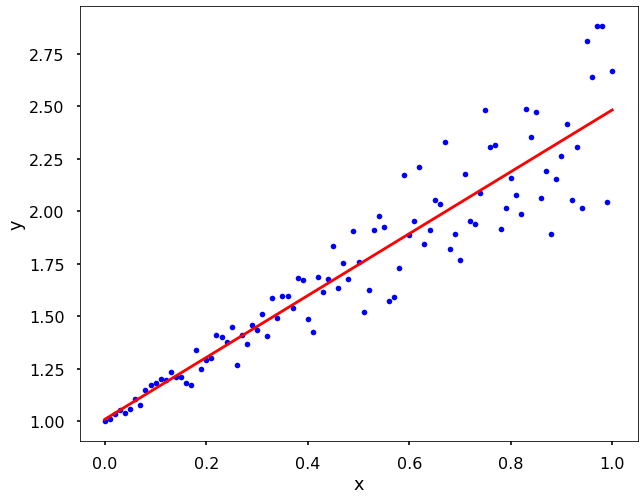

In [11]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, beta[0]*x + beta[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
